# Import and Clean Dataset

In [43]:
import csv
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [44]:
psych_csv = Path("psyco.csv")
df = pd.read_csv(psych_csv)

df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [45]:
# Clean incorrectly coded age range "Dec-18" to "0-18"
def age_modification(age_range):
    if 'Dec-18' in age_range:
        return "0-18"
    else:
        return age_range

df['age'] = df['age'].apply(age_modification)
    
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [46]:
# Change the binary columns into usable data

# Loop through the rows to recode the values
def recode_hw(value):
    # Specify conditions and recoding mappings
    conditions = [11, 101, 111, 1001, 1011, 1101, 1111]
    recoding_mappings = [10, 100, 110, 1000, 1010, 1100, 1110]

    if value in conditions:
        return recoding_mappings[conditions.index(value)]
    else:
        return value

# Apply to the binary columns
df['recoded_like_hw'] = df['like_hw'].apply(recode_hw)
df['recoded_dislike_hw'] = df['dislike_hw'].apply(recode_hw)

df

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,recoded_like_hw,recoded_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN,100,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN,1110,1110
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN,1100,110
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN,100,1110
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN,1010,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,...,0.0,10,1,Complete Physical Attendance,Yes,NaN,9,NaN,10,1
1171,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,...,-0.5,100,111,Complete Physical Attendance,Maybe,NaN,5,NaN,100,110
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,...,0.0,1111,110,Complete Physical Attendance,Maybe,NaN,9,NaN,1110,110
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,...,-0.5,1111,1100,Complete Physical Attendance,Yes,NaN,11,NaN,1110,1100


In [47]:
# Ensure the values were recoded correctly and both columns have the same values 
likehw_unique_values = np.sort(df['recoded_like_hw'].unique())
dislikehw_unique_values = np.sort(df['recoded_dislike_hw'].unique())

print(f'The values in the sorted_like_hw column are {likehw_unique_values}')
print(f'The values in the sorted_dislike_hw column are {dislikehw_unique_values}')

The values in the sorted_like_hw column are [   1   10  100  110 1000 1010 1100 1110]
The values in the sorted_dislike_hw column are [   1   10  100  110 1000 1010 1100 1110]


In [48]:
# As there are 8 unique values, convert values into a 8-point scale for easier interpretation
scale_mapping = {
    1: 1,
    10: 2,
    100: 3,
    110: 4,
    1000: 5,
    1010: 6,
    1100: 7,
    1110: 8
}

df['scaled_like_hw'] = df['recoded_like_hw'].map(scale_mapping)
df['scaled_dislike_hw'] = df['recoded_dislike_hw'].map(scale_mapping)

df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,recoded_like_hw,recoded_dislike_hw,scaled_like_hw,scaled_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1,Complete Physical Attendance,Yes,NaN,7,NaN,100,1,3,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1110,Complete Physical Attendance,No,NaN,7,NaN,1110,1110,8,8
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,111,Complete Physical Attendance,Yes,NaN,7,NaN,1100,110,7,4
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,1111,Complete Physical Attendance,Yes,NaN,7,NaN,100,1110,3,8
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,1000,Complete Physical Attendance,Yes,NaN,7,NaN,1010,1000,6,5


In [49]:
# Drop binary columns, recoded columns, and custom data columns 
df = df.drop(columns=["like_hw", "dislike_hw", "recoded_like_hw", "recoded_dislike_hw", "Unnamed: 19", "time_bp.1", "travel+work"])
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,scaled_like_hw,scaled_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,Complete Physical Attendance,Yes,3,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,Complete Physical Attendance,No,8,8
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,Complete Physical Attendance,Yes,7,4
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,Complete Physical Attendance,Yes,3,8
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,Complete Physical Attendance,Yes,6,5


In [50]:
# Determine sample size

num_rows = df.shape[0]
print(f'The sample size is n = {num_rows}')

The sample size is n = 1175


gender
Male                 649
Female               518
Prefer not to say      8
Name: count, dtype: int64


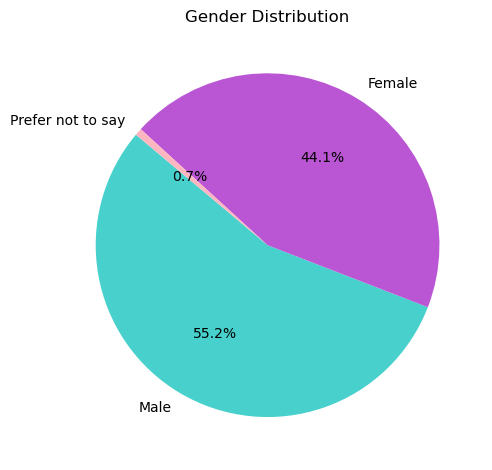

In [51]:
# Determine gender distribution of dataset with piechart

gender_counts = df['gender'].value_counts()
colors = ['mediumturquoise', 'mediumorchid', 'lightpink']

gender_image = plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution')
plt.tight_layout()

print(gender_counts)
plt.show()

age
19-25    345
26-32    261
40-50    181
50-60    170
33-40    102
0-18      74
60+       42
Name: count, dtype: int64


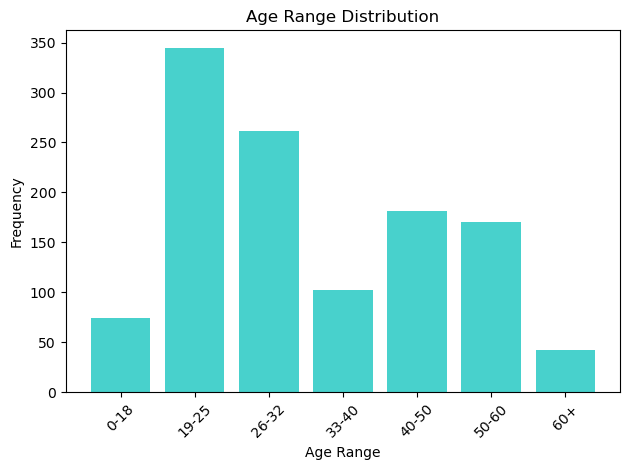

In [52]:
# Determine age distribution of dataset

age_counts = df['age'].value_counts()
age_counts_sorted = age_counts.sort_index()

plt.bar(age_counts_sorted.index, age_counts_sorted.values, color='mediumturquoise')
plt.title('Age Range Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

print(age_counts)
plt.show()

occupation
Working Professional                                    479
Student in College                                      358
Entrepreneur                                            119
Homemaker                                                82
Medical Professional aiding efforts against COVID-19     73
Currently Out of Work                                    44
Student in School                                        18
Retired/Senior Citizen                                    2
Name: count, dtype: int64


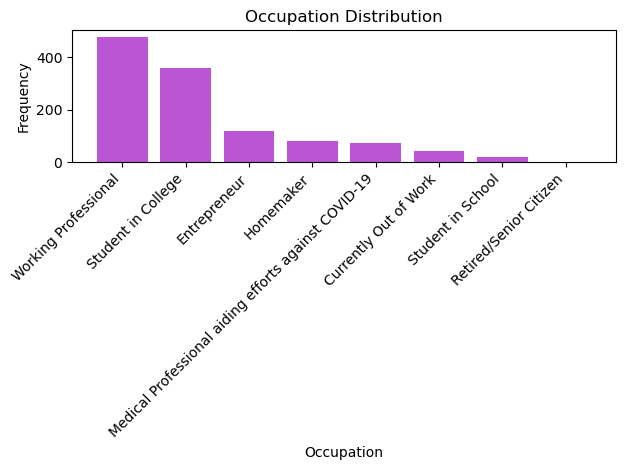

In [53]:
# Determine the occupation/education distribution of the dataset

occupation_counts = df['occupation'].value_counts()

plt.bar(occupation_counts.index, occupation_counts.values, color="mediumorchid")
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()


print(occupation_counts)
plt.show()

Question 1: Does one's profession influence their level of satisfaction or dissatisfaction with working from home?

In [54]:
#Selecting the columns required
hw_work_data = df[['line_of_work', 'scaled_like_hw', 'scaled_dislike_hw']]

In [55]:
#Group data by line of work and calculate the relationships of whether they like hw or not
hw_work_data = hw_work_data.groupby('line_of_work').mean()
hw_work_data

hw_work_data_styled = hw_work_data.style.set_caption("Line of work and whether or not they like working from home").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'white'),
        ('font-size', '20px')
    ]
}]).set_properties(**{'text-align': 'left'})
hw_work_data_styled

,scaled_like_hw,scaled_dislike_hw
line_of_work,,
APSPDCL,8.000000,7.000000
Architect,6.000000,4.666667
Architecture,3.000000,7.000000
Engineering,6.250000,5.189655
Government Employee,3.057143,1.771429
Management,4.151515,4.363636
Other,7.350000,7.200000
Teaching,5.405530,5.571429


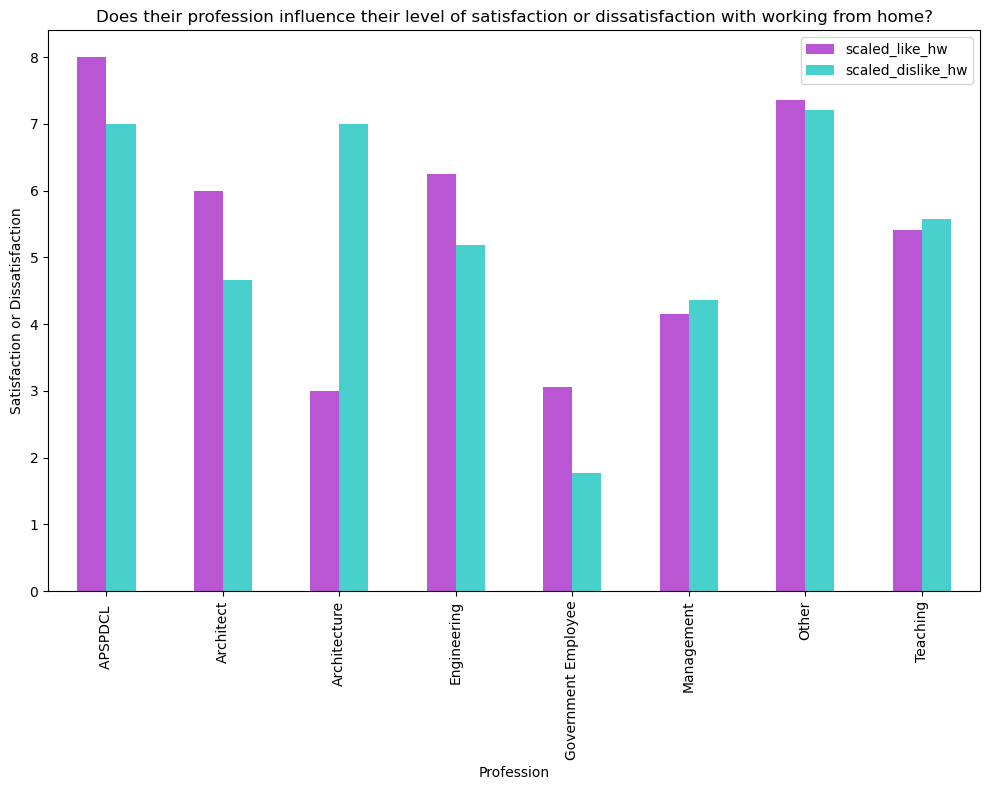

In [56]:
#Plotting a bar chart using matplotlib to visualize whether or not they like working from home depending on line of work
#Note this was on a scale of 1-8
hw_work_data.plot(kind='bar', figsize=(10, 8), color = ['mediumorchid', 'mediumturquoise'])
plt.xlabel('Profession')
plt.ylabel('Satisfaction or Dissatisfaction')
plt.title('Does their profession influence their level of satisfaction or dissatisfaction with working from home?')
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

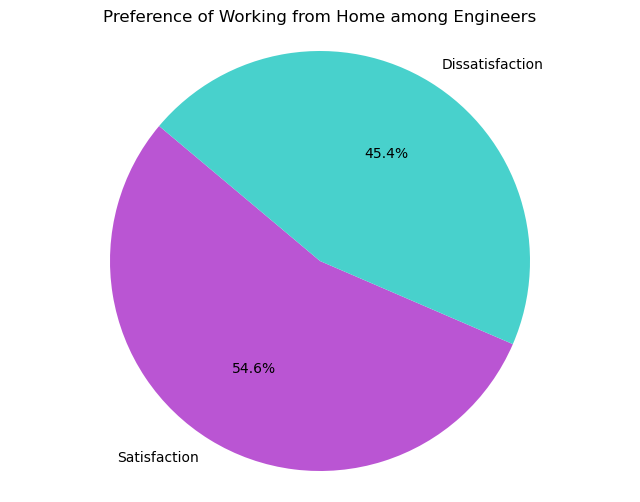

In [57]:
#For a different look, specifically choosing one line of work and seeing the percentage of those workers that like working from home in a pie chart

# Filter the data for engineers
engineers_data = hw_work_data.loc["Engineering"]

# Count the number of engineers who like and dislike working from home
like_count = engineers_data["scaled_like_hw"]
dislike_count = engineers_data["scaled_dislike_hw"]

# Create a pie chart
labels = ['Satisfaction', 'Dissatisfaction']
sizes = [like_count, dislike_count]
colors = ['mediumorchid', 'mediumturquoise']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Preference of Working from Home among Engineers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Q2.How do people feel about their home environment?

In [58]:
# Unique counts for work in home environment 
home_envir = {}
home_envir = df["home_env"].value_counts()
dict(home_envir)

{3: 327, 2: 309, 1: 215, 4: 200, 5: 124}

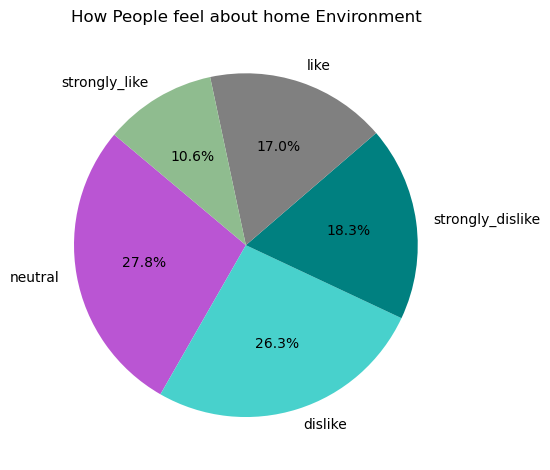

In [59]:
# Create a pie chart to get a snap shot on how peopl like home environment

colors = ["mediumorchid","mediumturquoise","teal","grey","darkseagreen"]
labels = []
size = []

for x,y in home_envir.items():
    if x == 1:
        labels.append("strongly_dislike")
    if x == 2:
        labels.append("dislike")    
    if x == 3:
        labels.append("neutral")
    if x == 4:
        labels.append("like")    
    if x == 5:
        labels.append("strongly_like")
   
    size.append(y)

#plot pie chart

plt.pie(size,labels = labels,colors=colors,autopct="%1.1f%%",shadow=False, startangle=140)
plt.title("How People feel about home Environment")
plt.tight_layout()
plt.show()

In [60]:
# determininng the unique counts of individual scales(1 to 8) in scaled dislike working from home 
individual_scale_counts = {}
individual_scale_counts = df["scaled_dislike_hw"].value_counts()
dict(individual_scale_counts)

{8: 284, 1: 211, 5: 171, 3: 155, 7: 148, 6: 89, 4: 86, 2: 31}

Q3.Is there any relationship between  one’s home environment and dislike working from home?

<function matplotlib.pyplot.show(close=None, block=None)>

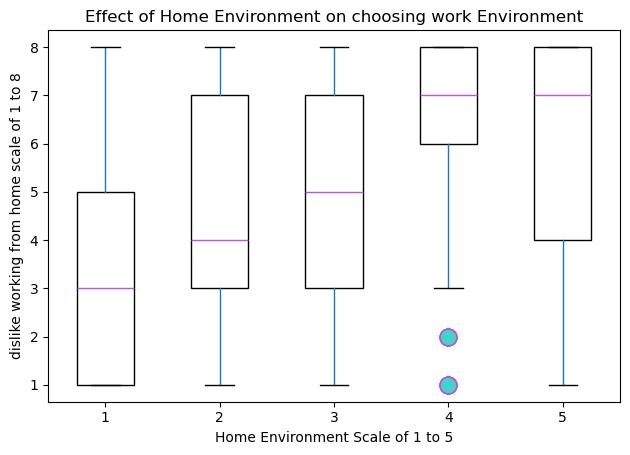

In [61]:
# create a box plot to see how home environment related to disliking of working from home
df.boxplot( by="home_env",column=["scaled_dislike_hw"],
           patch_artist=True,
           boxprops=dict(facecolor="white"),
           medianprops=dict(color="mediumorchid"),
           flierprops=dict(marker="o",markerfacecolor="mediumturquoise",
           markersize=12,linestyle="none",markeredgecolor="mediumorchid"))
plt.title("Effect of Home Environment on choosing work Environment")
plt.suptitle("")
plt.xlabel("Home Environment Scale of 1 to 5")
plt.ylabel("dislike working from home scale of 1 to 8")
plt.xticks([1,2,3,4,5])
plt.grid(False)
plt.tight_layout()
plt.show                                    
                

In [62]:
# determininng the unique counts of individual scales(1 to 8) in scaled like working from home 
individual_scale_counts = {}
individual_scale_counts = df["scaled_like_hw"].value_counts()
dict(individual_scale_counts)

{8: 283, 3: 239, 5: 230, 7: 195, 2: 73, 6: 72, 4: 66, 1: 17}

<function matplotlib.pyplot.show(close=None, block=None)>

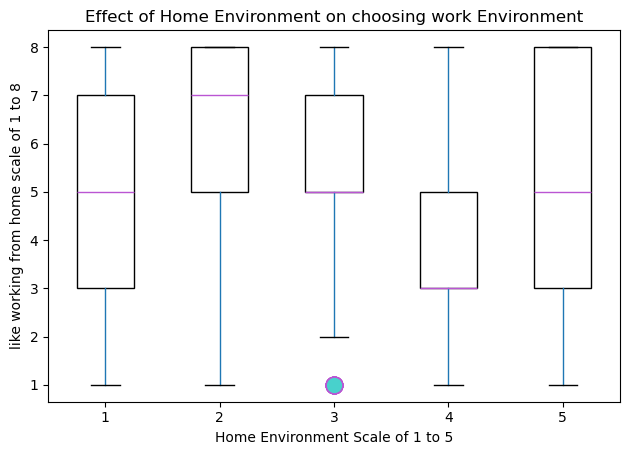

In [63]:
# create a box plot to see how home environment related to liking of working from home
df.boxplot( by="home_env",column=["scaled_like_hw"],
           patch_artist=True,
           boxprops=dict(facecolor="white"),
           medianprops=dict(color="mediumorchid"),
           flierprops=dict(marker="o",markerfacecolor="mediumturquoise",
           markersize=12,linestyle="none",markeredgecolor="mediumorchid"))
plt.title("Effect of Home Environment on choosing work Environment")
plt.suptitle("")
plt.xlabel("Home Environment Scale of 1 to 5")
plt.ylabel("like working from home scale of 1 to 8")
plt.xticks([1,2,3,4,5])
plt.grid(False)
plt.tight_layout()
plt.show  

Q4.Is there a change in time spent on work before vs. during the COVID-19 pandemic?

In [64]:
#Checking for Null Values
df.occupation.unique()

array(['Student in College', 'Student in School', 'Working Professional',
       'Entrepreneur', 'Retired/Senior Citizen', 'Homemaker',
       'Currently Out of Work',
       'Medical Professional aiding efforts against COVID-19'],
      dtype=object)

In [65]:
df.isnull().sum()

age                    0
gender                 0
occupation             0
line_of_work         696
time_bp                0
time_dp                0
travel_time            0
easeof_online          0
home_env               0
prod_inc               0
sleep_bal              0
new_skill              0
fam_connect            0
relaxed                0
self_time              0
prefer                 0
certaindays_hw         0
scaled_like_hw         0
scaled_dislike_hw      0
dtype: int64

In [66]:
#selecting the columns required
occ_time_data = df[['occupation', 'time_bp', 'time_dp']]

In [67]:
#Group data by occupation and calculate the average work hours
occ_avg_time = occ_time_data.groupby('occupation').mean()
occ_avg_time

occ_avg_time_styled = occ_avg_time.style.set_caption("Average Work Hours by Occupation").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'white'),
        ('font-size', '20px')
    ]
}]).set_properties(**{'text-align': 'left'})
occ_avg_time_styled

,time_bp,time_dp
occupation,,
Currently Out of Work,8.545455,4.886364
Entrepreneur,6.621849,8.857143
Homemaker,4.951220,10.158537
Medical Professional aiding efforts against COVID-19,8.945205,9.739726
Retired/Senior Citizen,8.000000,10.500000
Student in College,6.885475,6.458101
Student in School,7.222222,6.388889
Working Professional,8.098121,8.572025


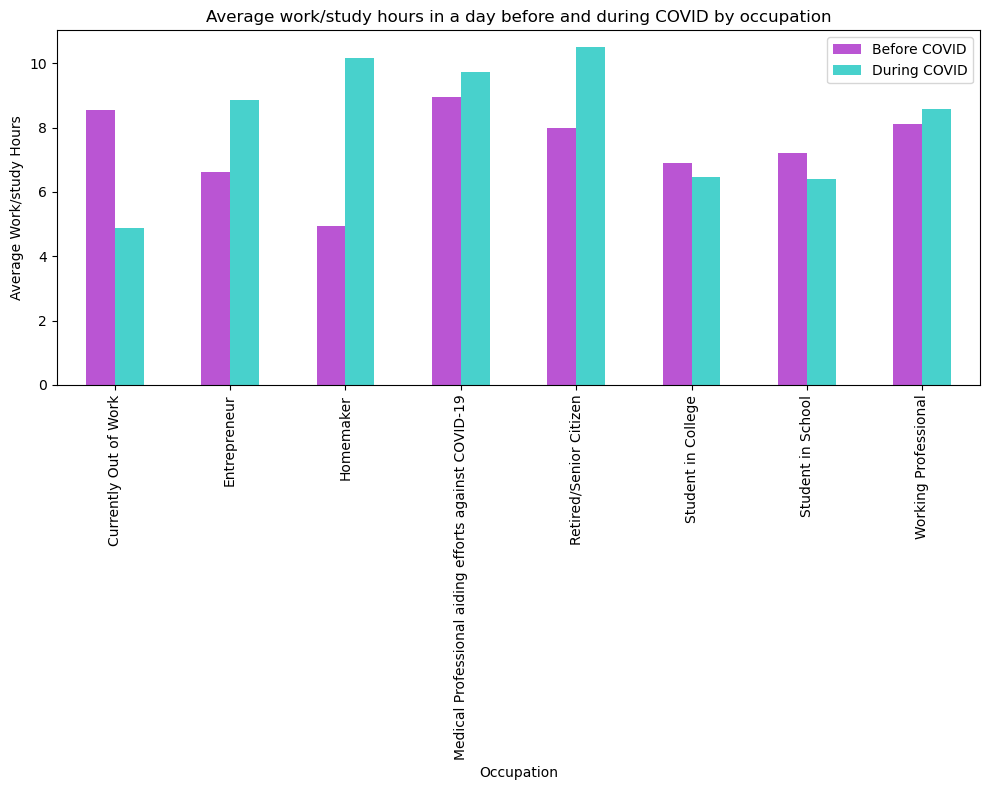

In [68]:
#Plotting Using matplotlib
occ_avg_time.plot(kind='bar', figsize=(10, 8), color = ['mediumorchid', 'mediumturquoise'])
plt.xlabel('Occupation')
plt.ylabel('Average Work/study Hours')
plt.title('Average work/study hours in a day before and during COVID by occupation')
plt.xticks(rotation= 90)
plt.legend(['Before COVID', 'During COVID'])
plt.tight_layout()
plt.show()

Q5.Is there a gender-based preference for remote work or complete physical attendance? 
If so, what is the ratio of preference between working from home and complete physical attendance among males and females?

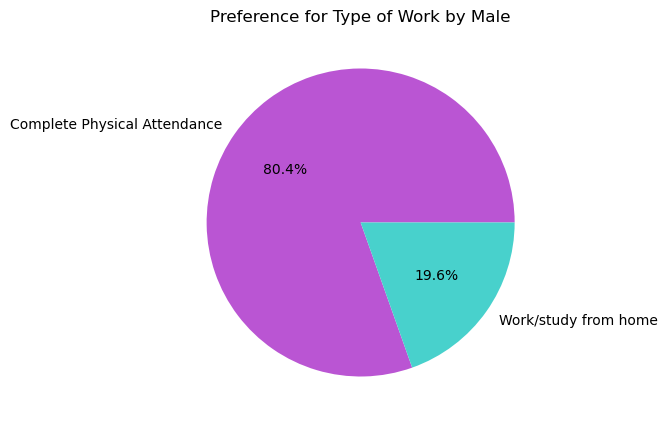

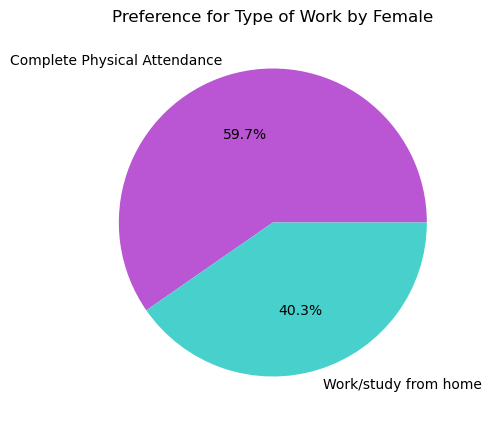

In [69]:
# Filter the DataFrame to remove rows with 'Prefer not to say'
df_filtered = df[df['gender'] != 'Prefer not to say']

# Calculate the counts for each preference by gender
count_by_preference_gender = df_filtered.groupby(['prefer', 'gender']).size()

# Extract counts for each gender
male_counts = count_by_preference_gender[:, 'Male']
female_counts = count_by_preference_gender[:, 'Female']

# Create the pie charts
fig, ax = plt.subplots(figsize=(9, 5))
ax.pie(male_counts, labels=df_filtered['prefer'].unique(), autopct='%1.1f%%', colors=['mediumorchid', 'mediumturquoise'])
ax.set_title('Preference for Type of Work by Male')
plt.show()

fig, ax = plt.subplots(figsize=(9, 5))
ax.pie(female_counts, labels=df_filtered['prefer'].unique(), autopct='%1.1f%%', colors=['mediumorchid', 'mediumturquoise'])
ax.set_title('Preference for Type of Work by Female')
plt.show()

Q6.Does self-rated sleep cycle quality affect productivity increase?

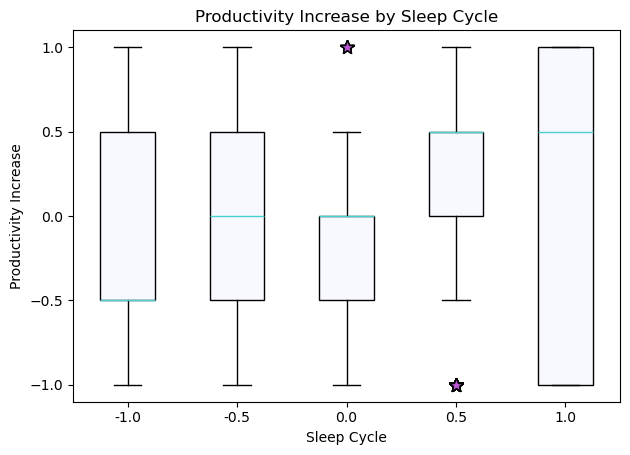

In [70]:
# Use boxplot to compare productivity increase distributions across self-reported sleep cycle scores

df.boxplot(by='sleep_bal', column=['prod_inc'],
            patch_artist=True,
            boxprops=dict(facecolor='ghostwhite'),
            whiskerprops=dict(color='k'),
            capprops=dict(color='k'),
            medianprops=dict(color='mediumturquoise'),
            flierprops=dict(markerfacecolor='mediumorchid', marker='*', markersize=10, linestyle='none'))
plt.title('Productivity Increase by Sleep Cycle')
plt.suptitle('') 
plt.xlabel('Sleep Cycle')
plt.ylabel('Productivity Increase')
plt.yticks([-1.0, -0.5, 0, 0.5, 1])
plt.grid(False)
plt.tight_layout()


plt.show()

Limitations

In [71]:
# Perform independent samples t-test to see if there is a significant difference between means in productivity for lowest and highest sleep quality groups
low_sleep_group = df[df['sleep_bal'] == -1]['prod_inc']
high_sleep_group = df[df['sleep_bal'] == 1]['prod_inc']

# Check to make sure groups are truly independent
if len(set(low_sleep_group.index).intersection(set(high_sleep_group.index))) > 0:
    print("Error: Overlapping observations found between the two groups")
else:
    # Perform independent samples t-test
    t_statistic, p_value = stats.ttest_ind(low_sleep_group, high_sleep_group)
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)

t-statistic: -3.153226753924604
p-value: 0.0017682981407245763
